 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [68]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
# Reading whale returns
whale_path=Path("whale_returns.csv")
whale_df=pd.read_csv(whale_path,index_col="Date", infer_datetime_format=True, parse_dates=True)

In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df.dropna(inplace=True)

In [28]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_path=Path("algo_returns.csv")
algo_df=pd.read_csv(algo_path,index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [26]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_path=Path("sp_tsx_history.csv")
sp_df=pd.read_csv(sp_path,index_col="Date", infer_datetime_format=True, parse_dates=True)


In [11]:
# Check Data Types
sp_df.dtypes


Close    object
dtype: object

In [12]:
# Fix Data Types
sp_df["Close"]=sp_df["Close"].str.replace("$","")
sp_df["Close"]=sp_df["Close"].str.replace(",","")
sp_df["Close"]=sp_df["Close"].astype('float')
sp_df.head()


/Users/feiyiyang/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [13]:
# Calculate Daily Returns
return_df=sp_df.pct_change()

In [15]:
# Drop nulls
return_df.dropna(inplace=True)


In [23]:
# Rename `Close` Column to be specific to this portfolio.
return_df=return_df.rename(columns={"Close":"SP_TSX60"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_df=pd.concat([whale_df,algo_df,return_df], axis=1, join="inner")

In [27]:
all_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

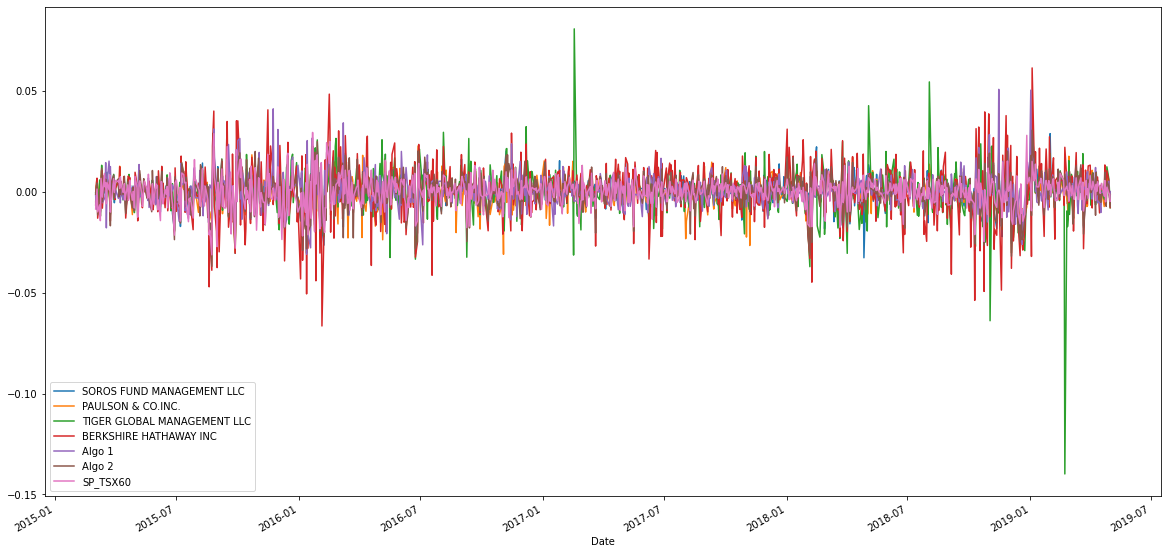

In [34]:
# Plot daily returns of all portfolios
all_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

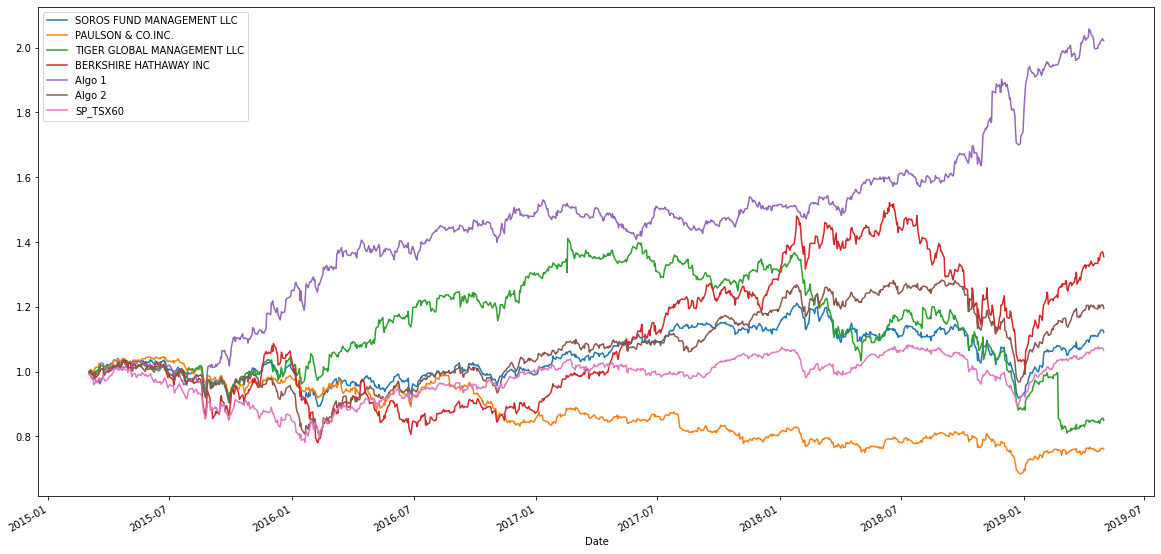

In [38]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + all_df).cumprod()
# Plot cumulative returns
cumulative_returns_df.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

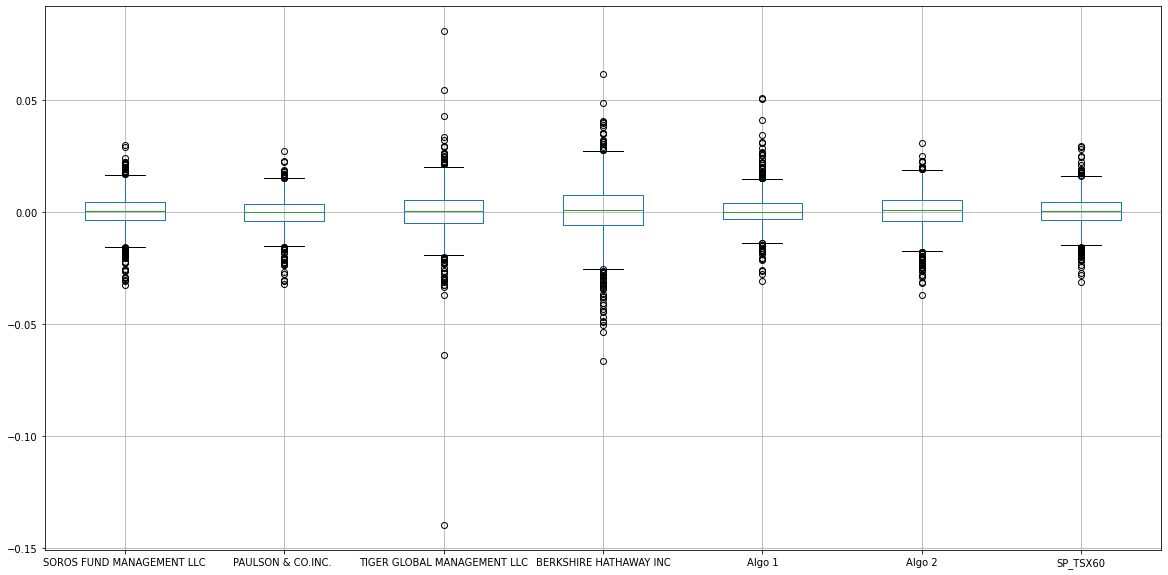

In [40]:
# Box plot to visually show risk
all_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [49]:
# Calculate the daily standard deviations of all portfolios
std_dev=all_df.std()
std_dev

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_TSX60                       0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [60]:
# Calculate  the daily standard deviation of S&P TSX 60
std_dev_sptsx=all_df["SP_TSX60"].std()
std_dev_sptsx
# Determine which portfolios are riskier than the S&P TSX 60
higher_risk_list=[]
for i,v in std_dev.items():
    if v>std_dev_sptsx:
        higher_risk_list.append(i)
print(f"{higher_risk_list} are riskier than S&P TSX 60")

['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2'] are riskier than S&P TSX 60
['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2']


### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized standard deviation (252 trading days)
std_dev_annualized=std_dev*252**0.5
std_dev_annualized

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_TSX60                       0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

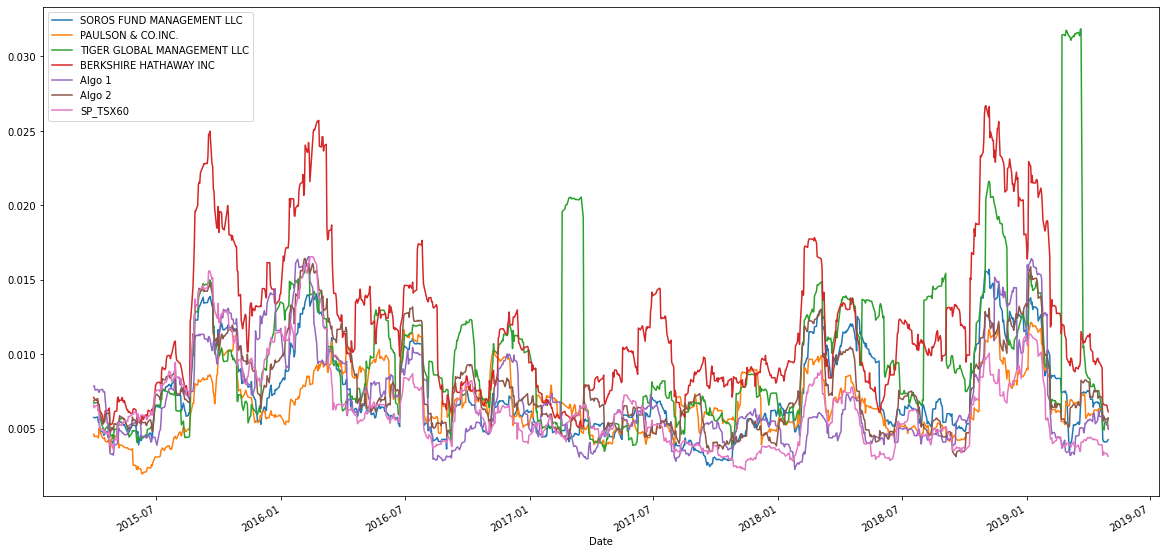

In [65]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std=all_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))


### Calculate and plot the correlation

SOROS FUND MANAGEMENT LLC      0.673930
PAULSON & CO.INC.              0.486511
TIGER GLOBAL MANAGEMENT LLC    0.440583
BERKSHIRE HATHAWAY INC         0.557250
Algo 1                         0.310276
Algo 2                         0.737370
SP_TSX60                       1.000000
Name: SP_TSX60, dtype: float64
Algo 2 may mimic the S&P as it has the highest correlation with SP TSX 60


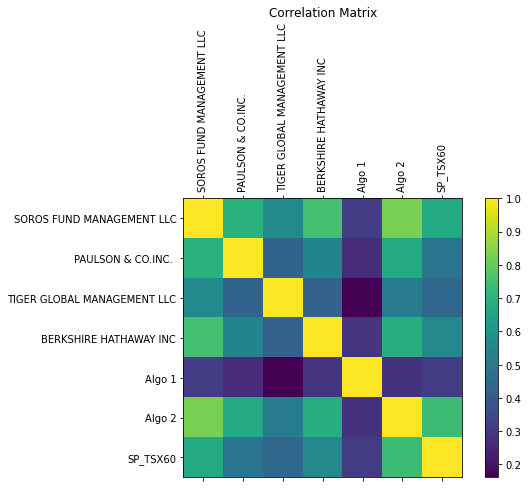

In [111]:
# Calculate the correlation
print(all_df.corr()["SP_TSX60"])
print("Algo 2 may mimic the S&P as it has the highest correlation with SP TSX 60")

# Display de correlation matrix
corr_heatmap=plt.figure(figsize=(8,5))
plt.matshow(all_df.corr(), fignum=corr_heatmap.number)
plt.xticks(range(all_df.select_dtypes(['number']).shape[1]), all_df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(all_df.select_dtypes(['number']).shape[1]), all_df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=12);



### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

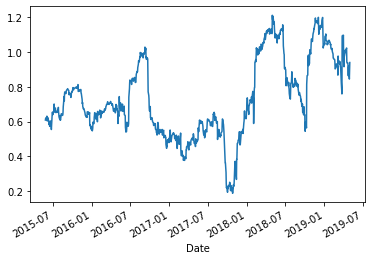

In [141]:
# Calculate covariance of a single portfolio
soro_cov=all_df.rolling(window=60).cov().unstack()["SP_TSX60"]["SOROS FUND MANAGEMENT LLC"]

# Calculate variance of S&P TSX
sp_var=all_df["SP_TSX60"].rolling(window=60).var()
# Computing beta
soro_beta=soro_cov/sp_var
# Plot beta trend
soro_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [144]:
# Use `ewm` to calculate the rolling window
std_ewm=all_df.ewm(halflife=21).std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

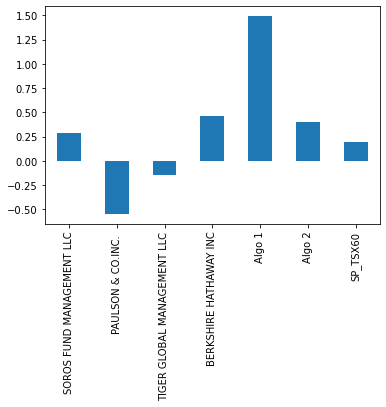

In [148]:
# Annualized Sharpe Ratios

#Assume the risk-free rate is 0
sharpe_ratios=(all_df.mean()*252)/(all_df.std()*np.sqrt(252))
sharpe_ratios

<AxesSubplot:>

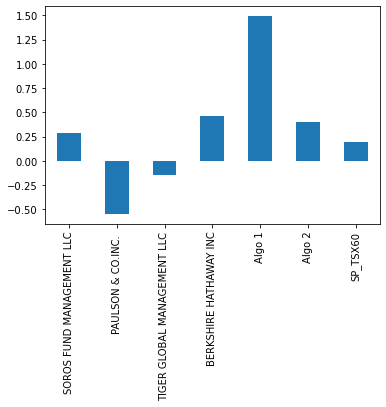

In [157]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.


Algo 1 has outperform both the market and the whales portfolios as it has significantly higher risk-adjusted return

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [158]:
# Reading data from 1st stock
tsla_price=pd.read_csv("TSLA_stockprice.csv")

In [167]:
# Reading data from 2nd stock
nvda_price=pd.read_csv("NVDA_stockprice.csv")
nvda_price.head()

,Date,Close
0,2015-01-02 16:00:00,5.03
1,2015-01-05 16:00:00,4.95
2,2015-01-06 16:00:00,4.80
3,2015-01-07 16:00:00,4.78
4,2015-01-08 16:00:00,4.97


In [160]:
# Reading data from 3rd stock
qqq_price=pd.read_csv("QQQ_stockprice.csv")

In [189]:
# Combine all stocks in a single DataFrame
my_portfolio=pd.concat([tsla_price, nvda_price["Close"],qqq_price["Close"] ], axis=1, join="inner")

In [190]:
my_portfolio.head()

,Date,Close,Close,Close
0,2015-01-02 16:00:00,43.86,5.03,102.94
1,2015-01-05 16:00:00,42.02,4.95,101.43
2,2015-01-06 16:00:00,42.26,4.80,100.07
3,2015-01-07 16:00:00,42.19,4.78,101.36
4,2015-01-08 16:00:00,42.12,4.97,103.30


In [191]:
# Reset Date index
my_portfolio=my_portfolio.set_index("Date")


In [ ]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns=["TSLA","NVDA","QQQ"]

In [198]:
# Calculate daily returns
stock_return=my_portfolio.pct_change()
# Drop NAs
stock_return.dropna(inplace=True)
# Display sample data
stock_return.head()

,TSLA,NVDA,QQQ
Date,,,
2015-01-05 16:00:00,-0.041952,-0.015905,-0.014669
2015-01-06 16:00:00,0.005712,-0.030303,-0.013408
2015-01-07 16:00:00,-0.001656,-0.004167,0.012891
2015-01-08 16:00:00,-0.001659,0.039749,0.019140
2015-01-09 16:00:00,-0.018756,0.004024,-0.006583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [233]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_return= stock_return.dot(weights).to_frame()
my_portfolio_return.columns=["My Portfolio"]
my_portfolio_return.index=pd.to_datetime(my_portfolio_return.index).date
# Display sample data
my_portfolio_return.head()


,My Portfolio
2015-01-05,-0.024175
2015-01-06,-0.012667
2015-01-07,0.002356
2015-01-08,0.019076
2015-01-09,-0.007105


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [231]:
# Join your returns DataFrame to the original returns DataFrame
all_df_2=pd.merge(all_df, my_portfolio_return,how="inner", left_index=True, right_index=True)

In [235]:
all_df_2.index.rename("Date",inplace=True)


In [238]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_df_2.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [240]:
# Calculate the annualized `std`
all_df_2_std=all_df_2.std()*np.sqrt(252)
all_df_2_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_TSX60                       0.111664
My Portfolio                   0.273038
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

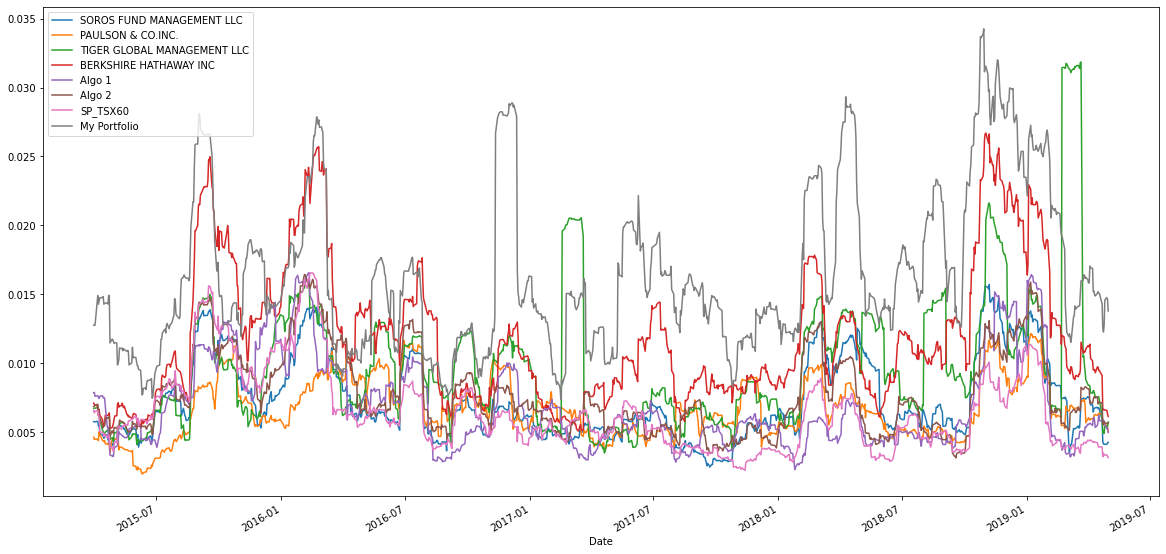

In [243]:
# Calculate rolling standard deviation
all_df_2_std_rolling=all_df_2.rolling(window=21).std()

# Plot rolling standard deviation
all_df_2_std_rolling.plot(figsize=(20,10))

### Calculate and plot the correlation

In [245]:
# Calculate and plot the correlation
all_df_2_corr=all_df_2.corr()
all_df_2_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX60,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930,0.606377
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511,0.439047
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583,0.397938
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250,0.646201
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276,0.183956
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370,0.597345
SP_TSX60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000,0.433085
My Portfolio,0.606377,0.439047,0.397938,0.646201,0.183956,0.597345,0.433085,1.000000


<AxesSubplot:>

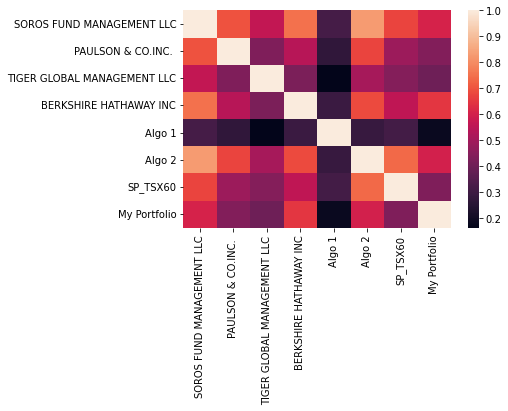

In [249]:
import seaborn as sns

sns.heatmap(all_df_2_corr)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [250]:
# Calculate and plot Beta

rolling_cov=all_df_2.rolling(window=60).cov().unstack()["My Portfolio"]["SP_TSX60"]
rolling_var=all_df_2["SP_TSX60"].rolling(window=60).var()
my_portfolio_sp_beta=rolling_cov/rolling_var

<AxesSubplot:xlabel='Date'>

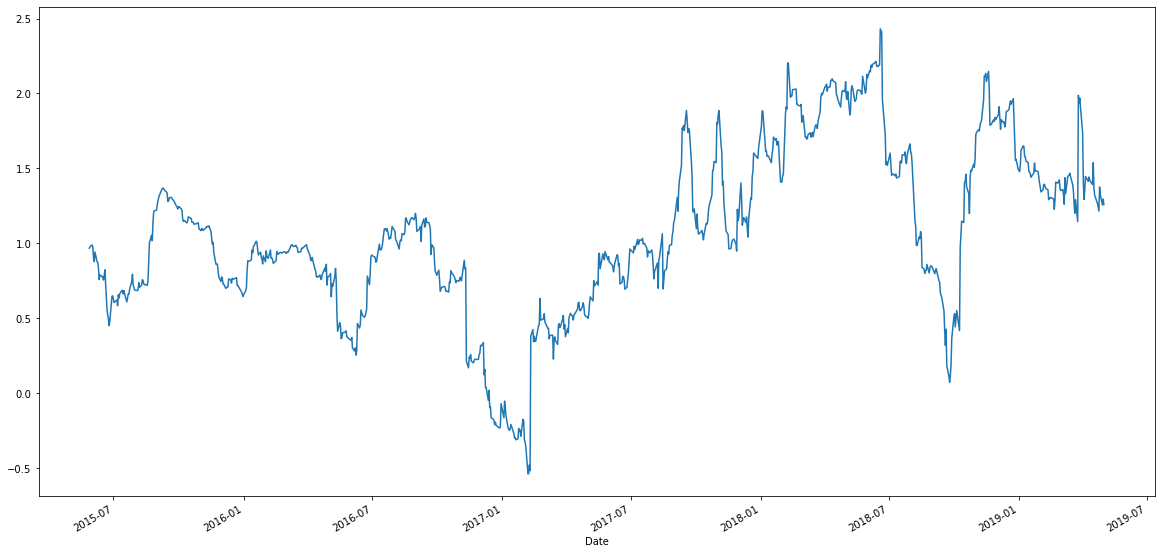

In [251]:
my_portfolio_sp_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [252]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2=(all_df_2.mean()*252)/(all_df_2.std()*np.sqrt(252))
sharpe_ratios_2

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP_TSX60                       0.195550
My Portfolio                   1.031704
dtype: float64

<AxesSubplot:>

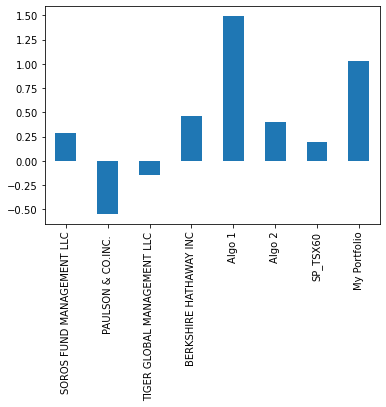

In [253]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

My portfolio has higher risk-adjusted return (sharp ratio) compared to all whale portfolios but lower than Algo 1. It has the highest volatility as evidenced by its overall standard deviation. It is mostly correlated with Berkshaire Hathaways portfolio.